In [7]:
from common import helpers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

scale_factor = 1
filename = input("Enter the filename: ")
iterator = helpers.load_evts_from_file(filename)
df = helpers.evts_to_df(iterator)

# convert t to a datetime object in a new column
df['datetime'] = pd.to_datetime(df['t'], unit='us', origin='unix')
# set the index to the datetime column
df = df.set_index('datetime')
df_pos = df[df['p'] == 1]
df_neg = df[df['p'] == 0]


# convert t to a datetime object in a new column
df_pos['datetime'] = pd.to_datetime(df_pos['t'], unit='us', origin='unix')
df_neg['datetime'] = pd.to_datetime(df_neg['t'], unit='us', origin='unix')
# create an elapsed time column
df_pos['elapsed'] = (df_pos['datetime'] - df_pos['datetime'].min()).dt.total_seconds()
df_neg['elapsed'] = (df_neg['datetime'] - df_neg['datetime'].min()).dt.total_seconds()

C:\Users\User\AppData\Local\Temp\ipykernel_12136\4271435681.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['datetime'] = pd.to_datetime(df_pos['t'], unit='us', origin='unix')
C:\Users\User\AppData\Local\Temp\ipykernel_12136\4271435681.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg['datetime'] = pd.to_datetime(df_neg['t'], unit='us', origin='unix')
C:\Users\User\AppData\Local\Temp\ipykernel_12136\4271435681.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [8]:
# Change this to change the time range

time_range = [26545000, 26620000]  # in microseconds

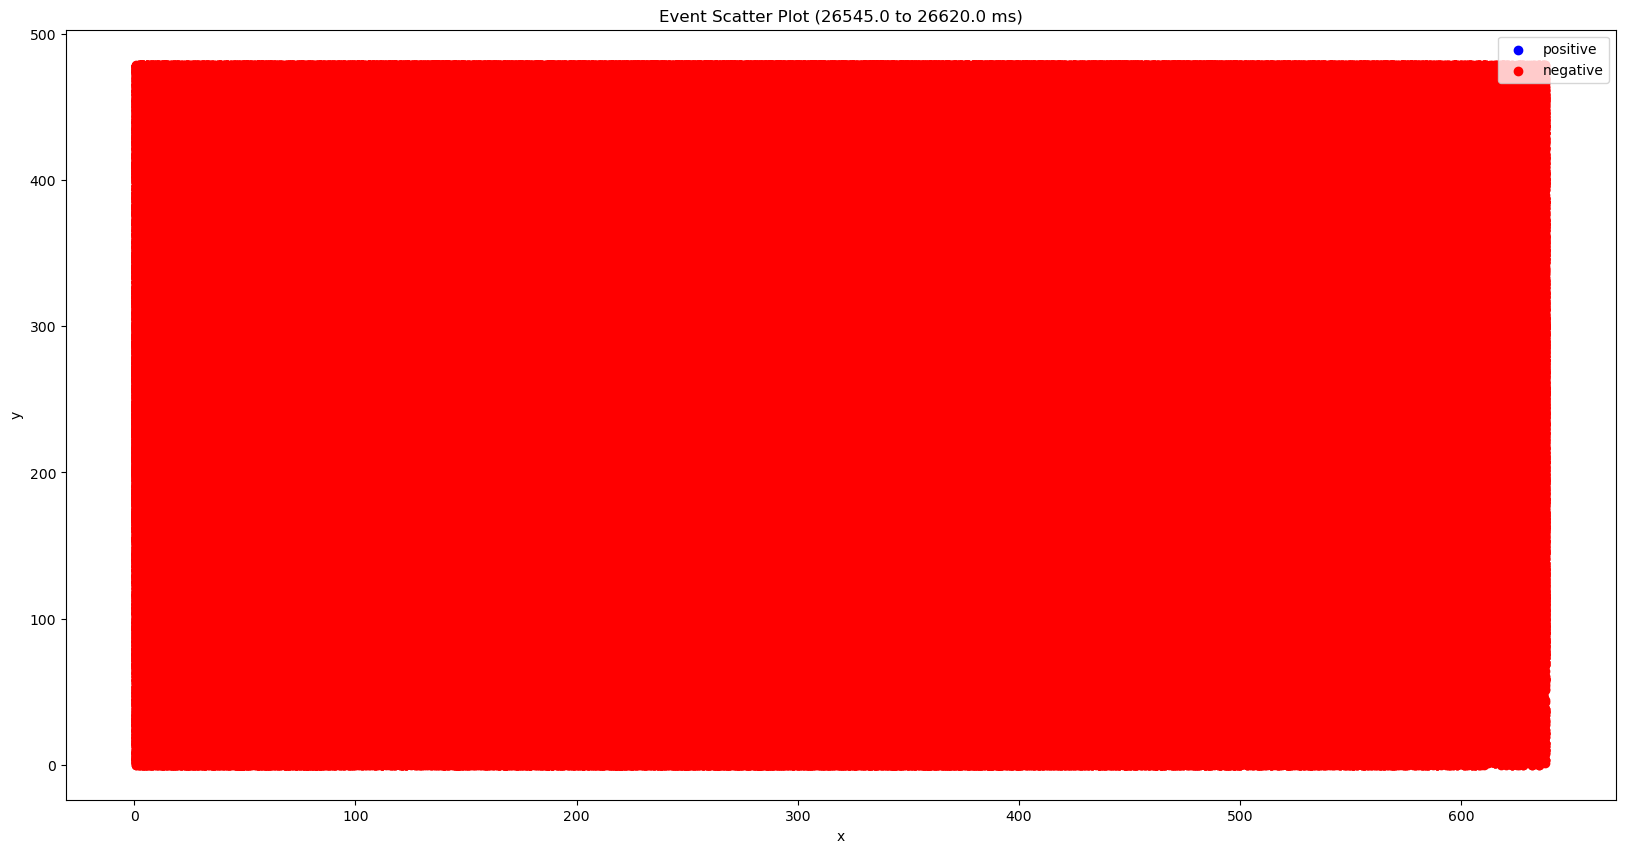

In [12]:


# Plot the data
fig, ax = plt.subplots(figsize=(20,10))
# filter out the events that are not in the time range
positive = df_pos[(df_pos['t'] >= time_range[0]) & (df_pos['t'] <= time_range[1])]
negative = df_neg[(df_neg['t'] >= time_range[0]) & (df_neg['t'] <= time_range[1])]

# plot x and y values in a scatter plot
ax.scatter(positive['x'], positive['y'], c='blue', label='positive')
ax.scatter(negative['x'], negative['y'], c='red', label='negative')
ax.set_title('Event Scatter Plot ({} to {} ms)'.format(time_range[0] / 1e3, time_range[1] / 1e3))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc="upper right")
plt.show()
